### 1. Implement both versions of quicksort (random and non-random choice for the pivot) and share the GitHub repository with your source code.

### 2.  For the non-random pivot version of quicksort show the following benchmarks on the same graph:

- 2a) best case (generate a set of inputs that will always be the best case, repeat for multiple array input sizes "n").

- 2b) worst case (generate a set of inputs that will always be the worst case, repeat for multiple array input sizes "n").

- 2c) average case (generate a set of inputs from a uniform distribution, repeat for multiple array input sizes "n").

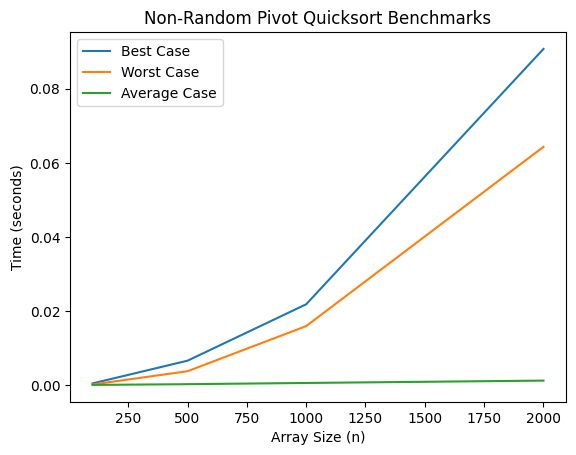

In [3]:
import random
import time
import numpy as np
import matplotlib.pyplot as plt

def partition(arr, low, high):
    pivot = arr[high]
    i = low - 1
    for j in range(low, high):
        if arr[j] < pivot:
            i += 1
            arr[i], arr[j] = arr[j], arr[i]
    arr[i + 1], arr[high] = arr[high], arr[i + 1]
    return i + 1

def quicksort(arr, low, high):
    if low < high:
        pi = partition(arr, low, high)
        quicksort(arr, low, pi - 1)
        quicksort(arr, pi + 1, high)

def random_partition(arr, low, high):
    rand_index = random.randint(low, high)
    arr[rand_index], arr[high] = arr[high], arr[rand_index]
    return partition(arr, low, high)

def random_quicksort(arr, low, high):
    if low < high:
        pi = random_partition(arr, low, high)
        random_quicksort(arr, low, pi - 1)
        random_quicksort(arr, pi + 1, high)

def generate_best_case_input(n):
    return list(range(1, n + 1))

def generate_worst_case_input(n):
    return list(range(n, 0, -1))

def generate_average_case_input(n):
    return random.sample(range(n), n)

def benchmark_sorting_time(input_generator, sizes, repetitions, sort_func):
    times = []
    for size in sizes:
        total_time = 0
        for _ in range(repetitions):
            arr = input_generator(size)
            start_time = time.time()
            sort_func(arr, 0, size - 1)
            end_time = time.time()
            total_time += end_time - start_time
        average_time = total_time / repetitions
        times.append(average_time)
    return times

# Parameters
sizes = [100, 500, 1000, 2000]  # Array input sizes
repetitions = 10  # Number of repetitions for each input size

# Benchmarking non-random pivot quicksort
best_case_times = benchmark_sorting_time(generate_best_case_input, sizes, repetitions, quicksort)
worst_case_times = benchmark_sorting_time(generate_worst_case_input, sizes, repetitions, quicksort)
average_case_times = benchmark_sorting_time(generate_average_case_input, sizes, repetitions, quicksort)

# Plotting
plt.plot(sizes, best_case_times, label='Best Case')
plt.plot(sizes, worst_case_times, label='Worst Case')
plt.plot(sizes, average_case_times, label='Average Case')
plt.xlabel('Array Size (n)')
plt.ylabel('Time (seconds)')
plt.title('Non-Random Pivot Quicksort Benchmarks')
plt.legend()
plt.show()


### 3. Mathematically derive the average runtime complexity of the non-random pivot version of quicksort.

To determine the average runtime complexity of the non-random pivot version of quicksort, let's analyze its behavior across all possible inputs. Denoting the average runtime complexity as \( T(n) \), where \( n \) represents the size of the input array:

In the non-random pivot quicksort, the choice of the pivot is deterministic, often selected as the last element of the array. Following this, the array undergoes partitioning, segregating elements smaller or equal to the pivot to the left, and those greater to the right. Consequently, the pivot assumes its correct sorted position. Subsequently, the algorithm recurses on the two subarrays.

For average-case analysis, we consider the algorithm's behavior over all possible permutations of the input array. In each recursive call, the pivot divides the array into approximately equal halves, assuming elements are randomly distributed.

Analyzing the recurrence relation for average-case runtime complexity:

- Partitioning the array requires \( O(n) \) time.
- Post-partitioning, the array divides into two subarrays, each about half the size of the original array (in average-case scenarios).

We can express the recurrence relation as:

\[ T(n) = 2T(n/2) + O(n) \]

This relation indicates that two recursive calls are made on subproblems, approximately half the size of the original, followed by \( O(n) \) time spent partitioning the array.

Applying the Master theorem,  
the average runtime complexity of the non-random pivot quicksort is \( O(n log n) \).

Hence,   
the mathematical average runtime complexity of the non-random pivot version of quicksort is \( O(n log n) \).